In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

with open('maestro_articulos_sigcom.json', encoding='utf-8') as file:
    MAESTRO_ARTICULOS = json.load(file)

sns.set_style("darkgrid")
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
def obtener_full_path(directorio):
    return [os.path.join(directorio, file) for file in os.listdir(directorio)]

In [13]:
df = pd.concat(map(lambda x: pd.read_csv(x, parse_dates=[
               0], dayfirst=True), obtener_full_path('input')))
df_movimientos = df.sort_values('Fecha')
df_movimientos.columns = df_movimientos.columns.str.replace(' ', '_')
df_movimientos.insert(1, 'Fecha_meses', df_movimientos['Fecha'].dt.to_period('M'))
df_movimientos.insert(2, 'Fecha_dias', df_movimientos['Fecha'].dt.to_period('D'))

In [14]:
df_movimientos

,Fecha,Fecha_meses,Fecha_dias,Codigo_Articulo,Nombre,Codigo_Articulo+Nombre,Movimiento,Origen,Destino,Motivo,Cantidad,Neto_Unitario,Neto_Total
0,2022-01-03 08:57:00,2022-01,2022-01-03,I354200,CANULAS YANKAHUER,I354200-CANULAS YANKAHUER,Salida,BODEGA CENTRAL ABASTECIMIENTO,PABELLÓN,Despacho,30,841.00,"25,230.00"
1,2022-01-03 08:57:00,2022-01,2022-01-03,S003700,ELECTROBISTURI LAPIZ,S003700-ELECTROBISTURI LAPIZ,Salida,BODEGA CENTRAL ABASTECIMIENTO,PABELLÓN,Despacho,20,"1,659.00","33,180.00"
2,2022-01-03 08:59:00,2022-01,2022-01-03,ET10100,INTEGRADOR VAPOR,ET10100-INTEGRADOR VAPOR,Salida,BODEGA CENTRAL ABASTECIMIENTO,ESTERILIZACION,Despacho Manual - Programado,400,199.87,"79,948.00"
3,2022-01-03 09:32:00,2022-01,2022-01-03,E973001,CERA PARA HUESO,E973001-CERA PARA HUESO,Entrada,COM. KENDALL LTDA.,BODEGA CENTRAL ABASTECIMIENTO,Recepcion,216,"1,350.00","291,600.00"
4,2022-01-03 09:36:00,2022-01,2022-01-03,I358400,TUBO ENDOTRAQUEAL Nº 8.0,I358400-TUBO ENDOTRAQUEAL Nº 8.0,Entrada,COM. KENDALL LTDA.,BODEGA CENTRAL ABASTECIMIENTO,Recepcion,50,"1,750.00","87,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2022-11-03 11:27:00,2022-11,2022-11-03,I048000,CANULA MAYO Nº 4,I048000-CANULA MAYO Nº 4,Salida,BODEGA CENTRAL ABASTECIMIENTO,PABELLÓN,Despacho,8,890.00,"7,120.00"
264,2022-11-03 11:27:00,2022-11,2022-11-03,I050700,BRANULA Nº 16 CORTA,I050700-BRANULA Nº 16 CORTA,Salida,BODEGA CENTRAL ABASTECIMIENTO,PABELLÓN,Despacho,50,350.00,"17,500.00"
263,2022-11-03 11:27:00,2022-11,2022-11-03,I004000,ALARGADOR ARTERIAL 30 CM M/H,I004000-ALARGADOR ARTERIAL 30 CM M/H,Salida,BODEGA CENTRAL ABASTECIMIENTO,PABELLÓN,Despacho,12,420.00,"5,040.00"
269,2022-11-03 11:27:00,2022-11,2022-11-03,RO6308800,GORRO MUJER,RO6308800-GORRO MUJER,Salida,BODEGA CENTRAL ABASTECIMIENTO,PABELLÓN,Despacho,1000,11.90,"11,900.00"


In [4]:
df_salidas = df_movimientos.query('Movimiento == "Salida"')
salidas_agrupadas = df_salidas.groupby(
    by=['Destino', 'Fecha_dias', 'Codigo_Articulo', 'Nombre']).sum() \
                                                              .reset_index()


In [5]:
salidas_agrupadas['Item_SIGFE'] = salidas_agrupadas['Codigo_Articulo'].apply(lambda x: MAESTRO_ARTICULOS[x]['Cod. SIGFE'])

In [6]:
item_presup = salidas_agrupadas.groupby(by=['Destino', 'Fecha_dias', 'Item_SIGFE']).sum().reset_index()

In [7]:
item_presup

,Destino,Fecha_dias,Item_SIGFE,Cantidad,Neto_Unitario,Neto_Total
0,ANATOMIA PATOLOGICA,2022-01-03,22.04.005.003,512,"14,855.68","351,840.00"
1,ANATOMIA PATOLOGICA,2022-01-20,22.04.003.002,4,"2,720,000.00","2,720,000.00"
2,ANATOMIA PATOLOGICA,2022-03-01,22.04.005.002,600,250.00,"150,000.00"
3,ANATOMIA PATOLOGICA,2022-03-24,22.04.003.002,4,"18,000.00","72,000.00"
4,ANATOMIA PATOLOGICA,2022-03-24,22.04.005.003,15,"5,000.00","75,000.00"
...,...,...,...,...,...,...
6592,UNIDAD DOCENTE ASISTENCIA,2022-03-17,22.04.001,15,"3,422.70","29,643.00"
6593,UNIDAD DOCENTE ASISTENCIA,2022-03-17,22.04.007.002,10,"7,151.00","35,692.00"
6594,UNIDAD DOCENTE ASISTENCIA,2022-03-21,22.04.005.003,2,540.00,"1,080.00"
6595,UNIDAD DOCENTE ASISTENCIA,2022-05-19,22.04.001,1,984.00,984.00


<AxesSubplot: label='A', xlabel='Fecha_dias', ylabel='Neto_Total'>

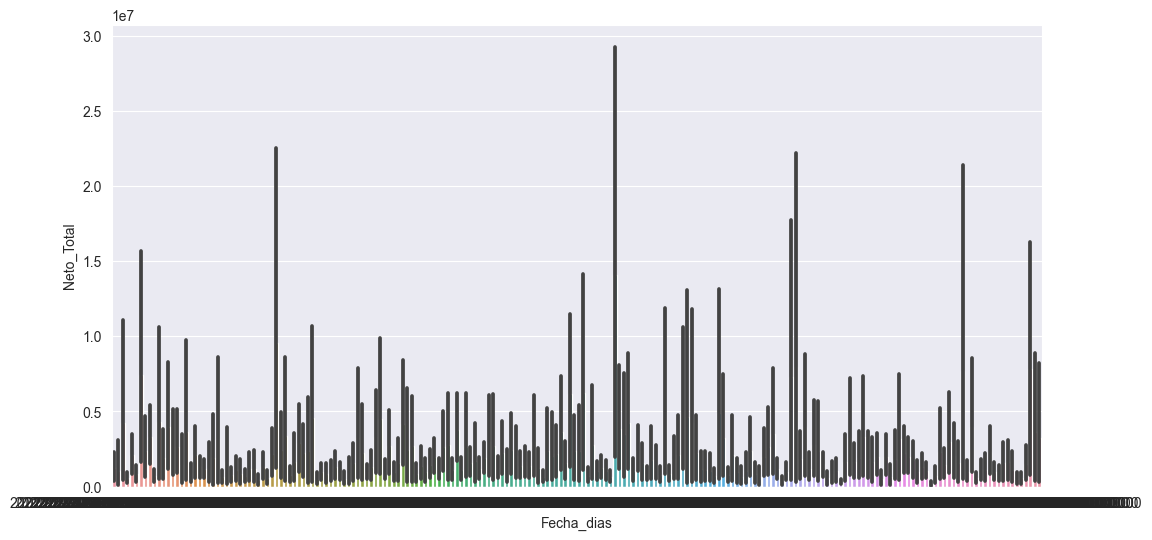

In [17]:
fig, axis = plt.subplot_mosaic('A', figsize=(12, 6))
sns.barplot(data=item_presup, x='Fecha_dias', y='Neto_Total', ax=axis['A'])

AttributeError: 'dict' object has no attribute 'bar'